In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [3]:
print(df['status_label'].value_counts())

status_label
alive     73462
failed     5220
Name: count, dtype: int64


# Balancing dataset

In [4]:
from sklearn.utils import resample

df_majority = df[df.status_label == "alive"]
df_minority = df[df.status_label == "failed"]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=42
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.head()
df_balanced.info()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
33494,C_3355,alive,1999,16.952,38.518,0.566,8.067,9.895,4.478,3.751,...,72.303,28.709,0.903,7.501,33.785,7.955,7.236,72.303,10.083,64.236
53927,C_5731,alive,2008,254.591,553.021,26.399,63.114,54.800,-97.527,96.535,...,752.698,382.437,183.000,36.715,199.677,94.204,-66.152,752.698,290.679,689.584
59602,C_6385,alive,2003,5.729,1.979,2.503,1.254,0.000,-2.167,1.430,...,14.319,19.145,0.000,-1.249,12.340,5.027,-44.144,14.319,5.130,13.065
56036,C_5979,alive,1999,0.343,0.314,0.152,0.294,0.000,0.065,0.220,...,0.918,2.550,0.560,0.142,0.604,0.571,0.163,0.918,1.147,0.624
13527,C_1123,alive,2008,347.365,255.642,18.900,25.694,98.833,-140.939,81.868,...,445.336,519.171,151.527,6.794,189.694,89.810,-134.082,445.336,268.583,419.642


<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 33494 to 78624
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  10440 non-null  object 
 1   status_label  10440 non-null  object 
 2   year          10440 non-null  int64  
 3   X1            10440 non-null  float64
 4   X2            10440 non-null  float64
 5   X3            10440 non-null  float64
 6   X4            10440 non-null  float64
 7   X5            10440 non-null  float64
 8   X6            10440 non-null  float64
 9   X7            10440 non-null  float64
 10  X8            10440 non-null  float64
 11  X9            10440 non-null  float64
 12  X10           10440 non-null  float64
 13  X11           10440 non-null  float64
 14  X12           10440 non-null  float64
 15  X13           10440 non-null  float64
 16  X14           10440 non-null  float64
 17  X15           10440 non-null  float64
 18  X16           10440 non-nul

In [5]:
X = df_balanced.drop(columns=["status_label", "company_name"])  # Features (all columns except status_label)
y = df_balanced["status_label"]  # Target column

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8352, 19)
X_test shape: (2088, 19)
y_train shape: (8352,)
y_test shape: (2088,)


## Random Forest

RandomForestClassifier()

Accuracy on train set: 1.0
Accuracy on test set: 0.7725095785440613

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.80      0.74      0.77      1052
      failed       0.75      0.81      0.78      1036

    accuracy                           0.77      2088
   macro avg       0.77      0.77      0.77      2088
weighted avg       0.77      0.77      0.77      2088



<Axes: >

<Axes: >

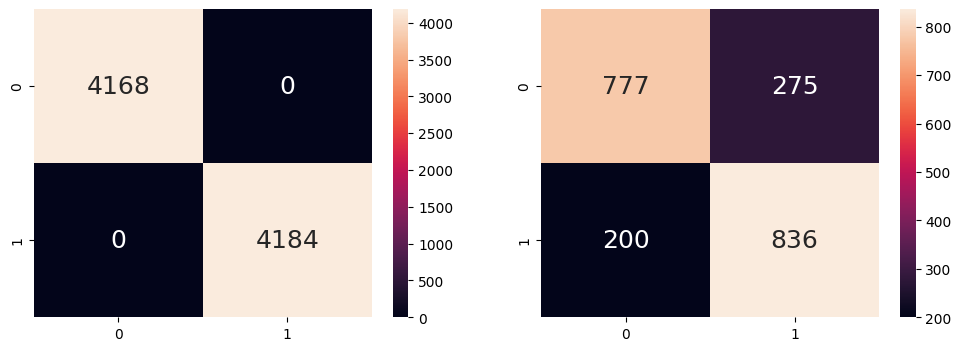

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict labels for train set
y_train_pred = rf.predict(X_train)

# Predict labels for test set
y_test_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4944 - loss: 463.4232
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5402 - loss: 156.3588  
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5469 - loss: 76.1851
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5438 - loss: 36.2902
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5270 - loss: 23.4976
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5246 - loss: 18.7153
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5343 - loss: 11.5102  
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5538 - loss: 5.6144
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5476 - loss: 4.6058
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.5326 - loss: 2.5919



Train set evaluation:
Train Loss: 2.0881471633911133
Train Accuracy: 0.5544779896736145

Test set evaluation:
Test Loss: 2.045017957687378
Test Accuracy: 0.5565134286880493
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


<Axes: >

<Axes: >

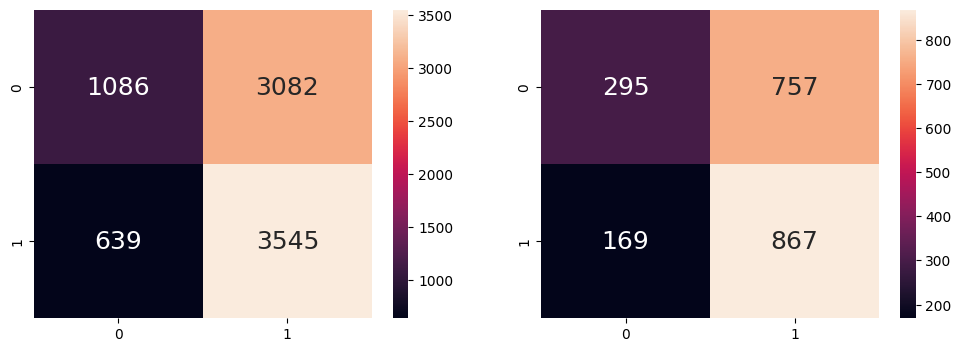

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


## No balancing

In [8]:
X = df.drop(columns=["status_label", "company_name"])  # Features (all columns except status_label)
y = df["status_label"]  # Target column

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62945, 19)
X_test shape: (15737, 19)
y_train shape: (62945,)
y_test shape: (15737,)


## Random Forest

RandomForestClassifier()

Accuracy on train set: 0.9999841131146239
Accuracy on test set: 0.9376628328143864

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.94      1.00      0.97     14678
      failed       0.99      0.07      0.14      1059

    accuracy                           0.94     15737
   macro avg       0.96      0.54      0.55     15737
weighted avg       0.94      0.94      0.91     15737



<Axes: >

<Axes: >

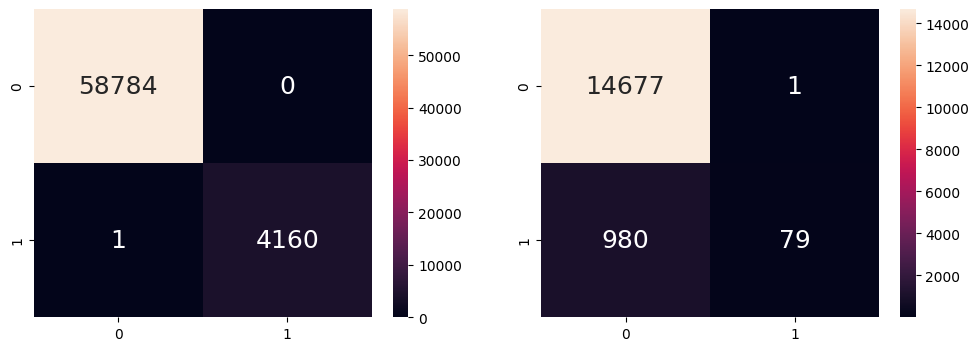

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict labels for train set
y_train_pred = rf.predict(X_train)

# Predict labels for test set
y_test_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras

Epoch 1/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8827 - loss: 58.7399
Epoch 2/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9208 - loss: 2.3691
Epoch 3/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9314 - loss: 1.0554
Epoch 4/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9334 - loss: 0.3197
Epoch 5/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9338 - loss: 0.3157
Epoch 6/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9338 - loss: 0.2518
Epoch 7/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9346 - loss: 0.2512
Epoch 8/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9358 - loss: 0.2460
Epoch 9/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9331 - loss: 0.2492
Epoch 10/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9333 - loss: 0.2463



Train set evaluation:
Train Loss: 0.24740004539489746
Train Accuracy: 0.9339264631271362

Test set evaluation:
Test Loss: 0.2655734121799469
Test Accuracy: 0.9326428174972534
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


<Axes: >

<Axes: >

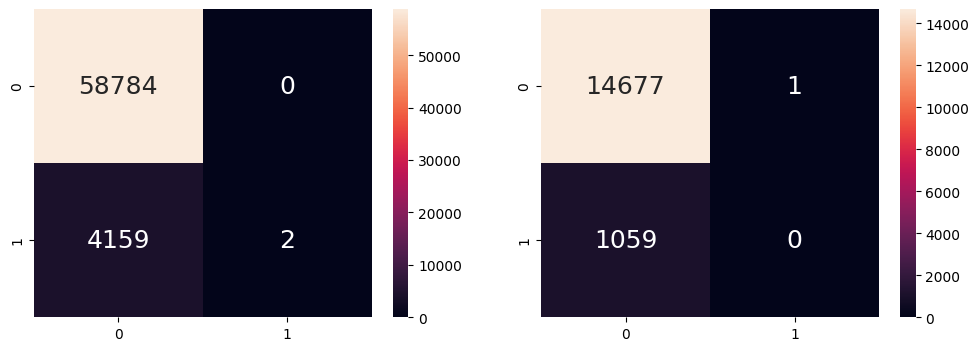

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Using recommended training, validation and test sets

In [16]:
df_train = df[df["year"] <= 2011]
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label"])
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55927 entries, 0 to 78653
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    55927 non-null  int64  
 1   X1      55927 non-null  float64
 2   X2      55927 non-null  float64
 3   X3      55927 non-null  float64
 4   X4      55927 non-null  float64
 5   X5      55927 non-null  float64
 6   X6      55927 non-null  float64
 7   X7      55927 non-null  float64
 8   X8      55927 non-null  float64
 9   X9      55927 non-null  float64
 10  X10     55927 non-null  float64
 11  X11     55927 non-null  float64
 12  X12     55927 non-null  float64
 13  X13     55927 non-null  float64
 14  X14     55927 non-null  float64
 15  X15     55927 non-null  float64
 16  X16     55927 non-null  float64
 17  X17     55927 non-null  float64
 18  X18     55927 non-null  float64
dtypes: float64(18), int64(1)
memory usage: 8.5 MB
<class 'pandas.core.series.Series'>
Index: 55927 entries, 0 to 78653

In [19]:
df_val = df[(df["year"] <= 2014) & (df["year"] >= 2012)]
y_val = df_val["status_label"]
X_val = df_val.drop(columns = ["company_name", "status_label"])
X_val.info()
y_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10473 entries, 13 to 78677
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    10473 non-null  int64  
 1   X1      10473 non-null  float64
 2   X2      10473 non-null  float64
 3   X3      10473 non-null  float64
 4   X4      10473 non-null  float64
 5   X5      10473 non-null  float64
 6   X6      10473 non-null  float64
 7   X7      10473 non-null  float64
 8   X8      10473 non-null  float64
 9   X9      10473 non-null  float64
 10  X10     10473 non-null  float64
 11  X11     10473 non-null  float64
 12  X12     10473 non-null  float64
 13  X13     10473 non-null  float64
 14  X14     10473 non-null  float64
 15  X15     10473 non-null  float64
 16  X16     10473 non-null  float64
 17  X17     10473 non-null  float64
 18  X18     10473 non-null  float64
dtypes: float64(18), int64(1)
memory usage: 1.6 MB
<class 'pandas.core.series.Series'>
Index: 10473 entries, 13 to 786

In [20]:
df_test = df[(df["year"] >= 2015)]
y_test = df_test["status_label"]
X_test = df_test.drop(columns = ["company_name", "status_label"])
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12282 entries, 16 to 78681
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    12282 non-null  int64  
 1   X1      12282 non-null  float64
 2   X2      12282 non-null  float64
 3   X3      12282 non-null  float64
 4   X4      12282 non-null  float64
 5   X5      12282 non-null  float64
 6   X6      12282 non-null  float64
 7   X7      12282 non-null  float64
 8   X8      12282 non-null  float64
 9   X9      12282 non-null  float64
 10  X10     12282 non-null  float64
 11  X11     12282 non-null  float64
 12  X12     12282 non-null  float64
 13  X13     12282 non-null  float64
 14  X14     12282 non-null  float64
 15  X15     12282 non-null  float64
 16  X16     12282 non-null  float64
 17  X17     12282 non-null  float64
 18  X18     12282 non-null  float64
dtypes: float64(18), int64(1)
memory usage: 1.9 MB
<class 'pandas.core.series.Series'>
Index: 12282 entries, 16 to 786

## Random Forest

RandomForestClassifier(random_state=42)

Validation Accuracy: 0.9555


<Axes: >

<Axes: >

Test Accuracy: 0.9764


<Axes: >

<Axes: >

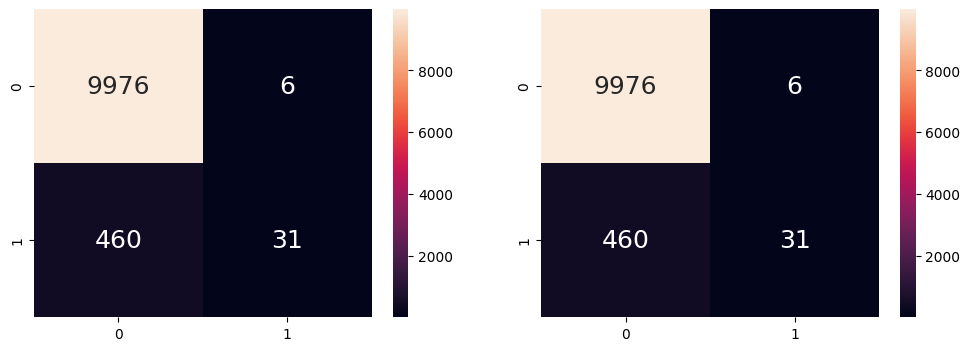

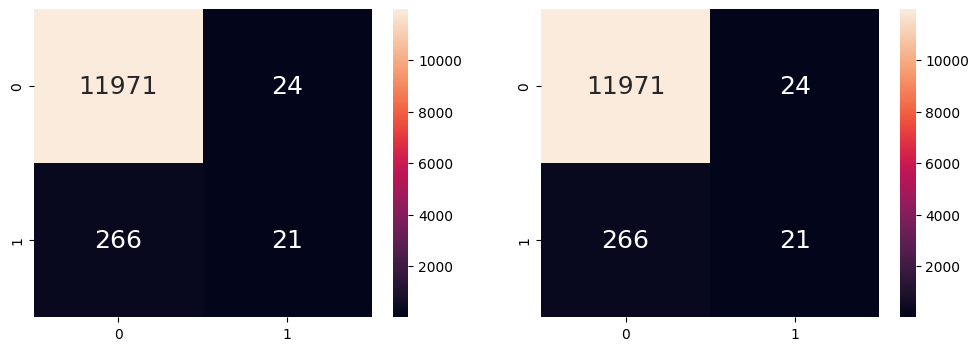

In [21]:

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Plot the Confusion Matrix for Train and val
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Hyperparameter tuning (example: adjusting n_estimators, max_depth, etc.)
# You can perform this step iteratively, adjusting hyperparameters based on validation performance

# Final evaluation on the test set
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras

Epoch 1/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8426 - loss: 95.3844 - val_accuracy: 0.9525 - val_loss: 3.4505
Epoch 2/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9140 - loss: 4.5101 - val_accuracy: 0.9528 - val_loss: 0.6113
Epoch 3/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9174 - loss: 1.4508 - val_accuracy: 0.9531 - val_loss: 0.2405
Epoch 4/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9197 - loss: 0.5373 - val_accuracy: 0.9527 - val_loss: 0.1991
Epoch 5/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9193 - loss: 0.3313 - val_accuracy: 0.9527 - val_loss: 0.2151
Epoch 6/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9194 - loss: 0.4511 - val_accuracy: 0.9524 - val_loss: 0.2280
Epoch 7/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9207 - loss: 0.2951 - val_accuracy: 0.9523 - val_loss: 0.2375
Epoch 8/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9193 - loss: 0.2919 -


Train set evaluation:
Train Loss: 0.27697986364364624
Train Accuracy: 0.9206286668777466

Test set evaluation:
Test Loss: 0.20184332132339478
Test Accuracy: 0.9763067960739136
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step


<Axes: >

<Axes: >

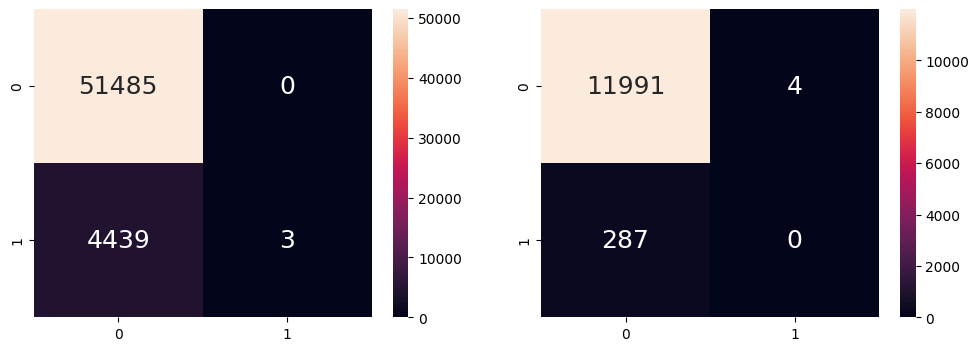

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])